In [14]:
# Data Manipulation
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Scaling
from sklearn.preprocessing import StandardScaler

#Train Test Split
from sklearn.model_selection import train_test_split

# Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

#Evaluation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

student = pd.read_csv('/content/xAPI-Edu-Data.csv')
student.head()


,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [15]:
#dataset description
student.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


In [16]:
#About dataset
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [17]:
# Replacing categorical values to numerical

student['gender'].replace('M', 0,inplace=True)
student['gender'].replace('F', 1,inplace=True)

# Or we can use get_dummies to convert categorical values and concatenate them later
nat = pd.get_dummies(student['NationalITy'])
sid = pd.get_dummies(student['StageID'])
gid = pd.get_dummies(student['GradeID'])
secid = pd.get_dummies(student['SectionID'])
topic = pd.get_dummies(student['Topic'])
semester = pd.get_dummies(student['Semester'])
rel = pd.get_dummies(student['Relation'])
pas = pd.get_dummies(student['ParentAnsweringSurvey'])
pss = pd.get_dummies(student['ParentschoolSatisfaction'])
sab = pd.get_dummies(student['StudentAbsenceDays'])

#Drop useless columns & columns we need to replace with variables above
student.drop(['NationalITy','PlaceofBirth','PlaceofBirth','StageID','GradeID','SectionID','Topic','Semester',
              'Relation','ParentAnsweringSurvey','ParentschoolSatisfaction','StudentAbsenceDays'],axis=1,inplace=True)

# Concatenating the variables we created above
student = pd.concat([student,nat,sid,gid,secid,topic,semester,rel,pas,pss,sab],axis=1)

<ipython-input-17-7e1a8bfc87da>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  student['gender'].replace('M', 0,inplace=True)
<ipython-input-17-7e1a8bfc87da>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

In [18]:
student.columns

Index(['gender', 'raisedhands', 'VisITedResources', 'AnnouncementsView',
       'Discussion', 'Class', 'Egypt', 'Iran', 'Iraq', 'Jordan', 'KW', 'Lybia',
       'Morocco', 'Palestine', 'SaudiArabia', 'Syria', 'Tunis', 'USA',
       'lebanon', 'venzuela', 'HighSchool', 'MiddleSchool', 'lowerlevel',
       'G-02', 'G-04', 'G-05', 'G-06', 'G-07', 'G-08', 'G-09', 'G-10', 'G-11',
       'G-12', 'A', 'B', 'C', 'Arabic', 'Biology', 'Chemistry', 'English',
       'French', 'Geology', 'History', 'IT', 'Math', 'Quran', 'Science',
       'Spanish', 'F', 'S', 'Father', 'Mum', 'No', 'Yes', 'Bad', 'Good',
       'Above-7', 'Under-7'],
      dtype='object')

In [19]:
Label = student['Class'] # Class is the value we want to predict

Features = student[['gender', 'raisedhands', 'VisITedResources', 'AnnouncementsView',
       'Discussion','Father', 'Mum', 'No', 'Yes', 'Bad', 'Good',
       'Above-7', 'Under-7']]

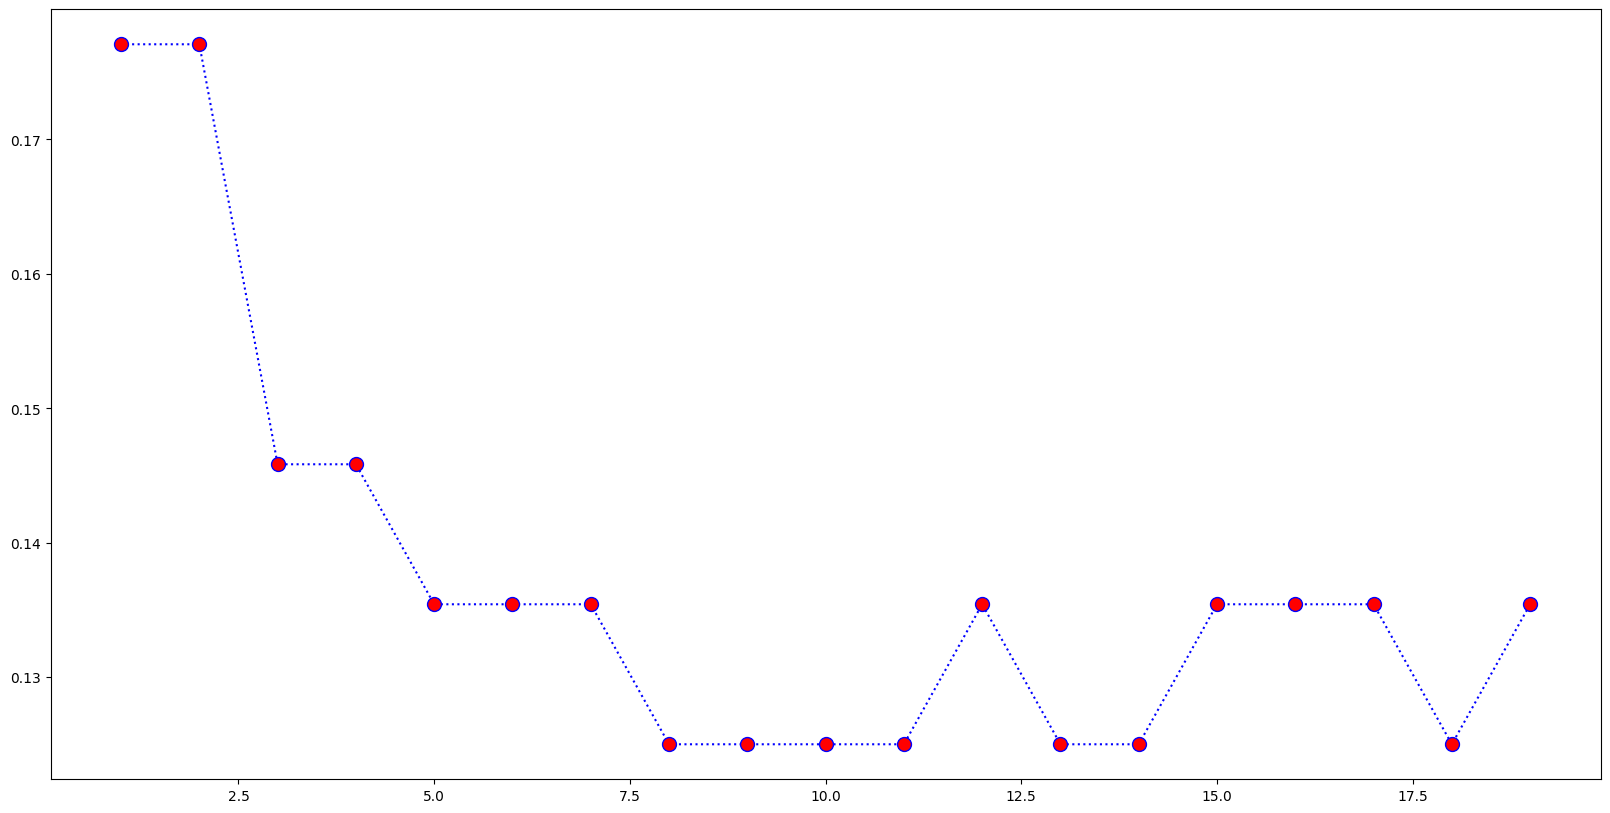

In [20]:
scaler = StandardScaler()
scaler.fit(Features)
scaled = scaler.transform(Features)

X = scaled
y = Label
# split the data to 20% test,80% train with random state=42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

err = [] # Array to save all error rates

for i in range(1,20): # Loop to try all error rates from 1 to 40
    rfe = RandomForestClassifier(n_estimators=i*10,random_state=42) # Create rfc with number of estimators with value i*10
    rfe.fit(X_train,y_train) # Fit the model
    errpred = rfe.predict(X_test) # Predict the value
    err.append(np.mean(errpred != y_test)) #Add the value to the array


# Plotting the value of estimators error rate using the method we created above to make it easier to choose an estimator value
plt.figure(figsize=(20,10)) # Size of the figure
plt.plot(range(1,20),err,color='blue',linestyle='dotted',marker='o',markerfacecolor='red',markersize=10)#plotting the values
plt.title = 'Number of estimators VS Error Rates' #title
plt.xlabel = 'Estimators' #X label
plt.ylabel= 'Error Rate' # Y label
plt.show()

              precision    recall  f1-score   support

           H       0.82      0.82      0.82        22
           L       0.89      0.92      0.91        26
           M       0.87      0.85      0.86        48

    accuracy                           0.86        96
   macro avg       0.86      0.87      0.86        96
weighted avg       0.86      0.86      0.86        96



Confusion matrix


<Axes: >

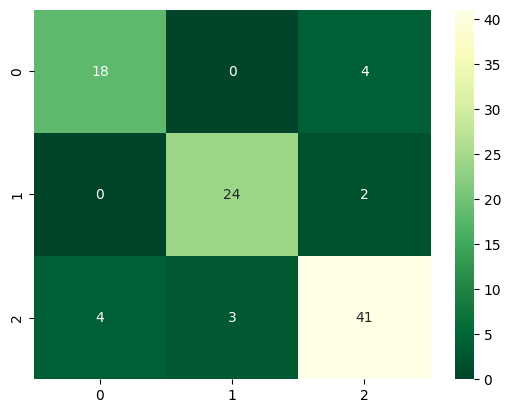

In [21]:
rfc = RandomForestClassifier(n_estimators=80,max_features=None, max_depth=9,min_samples_leaf=1, # Changed max_features from 'auto' to None
                             min_samples_split=2,bootstrap=True, random_state = 42)
rfc.fit(X_train,y_train)
rfcpred = rfc.predict(X_test)

print(classification_report(y_test,rfcpred))

print('\n')

print('Confusion matrix')
sns.heatmap(confusion_matrix(y_test,rfcpred),cmap='YlGn_r',annot=True,fmt='g')

In [22]:
rfcpred#predicted values of sample test dataset from split

array(['M', 'L', 'H', 'H', 'H', 'L', 'L', 'L', 'M', 'M', 'M', 'H', 'M',
       'L', 'M', 'H', 'L', 'M', 'L', 'M', 'M', 'H', 'L', 'M', 'L', 'L',
       'H', 'M', 'L', 'M', 'M', 'M', 'L', 'H', 'M', 'M', 'M', 'M', 'M',
       'H', 'M', 'H', 'L', 'M', 'H', 'L', 'H', 'M', 'M', 'M', 'M', 'M',
       'L', 'M', 'M', 'M', 'L', 'H', 'M', 'L', 'M', 'L', 'L', 'H', 'M',
       'M', 'L', 'H', 'L', 'H', 'M', 'H', 'M', 'M', 'M', 'L', 'M', 'L',
       'L', 'H', 'H', 'M', 'M', 'H', 'H', 'M', 'M', 'L', 'L', 'M', 'M',
       'M', 'M', 'M', 'L', 'H'], dtype=object)

<Axes: >

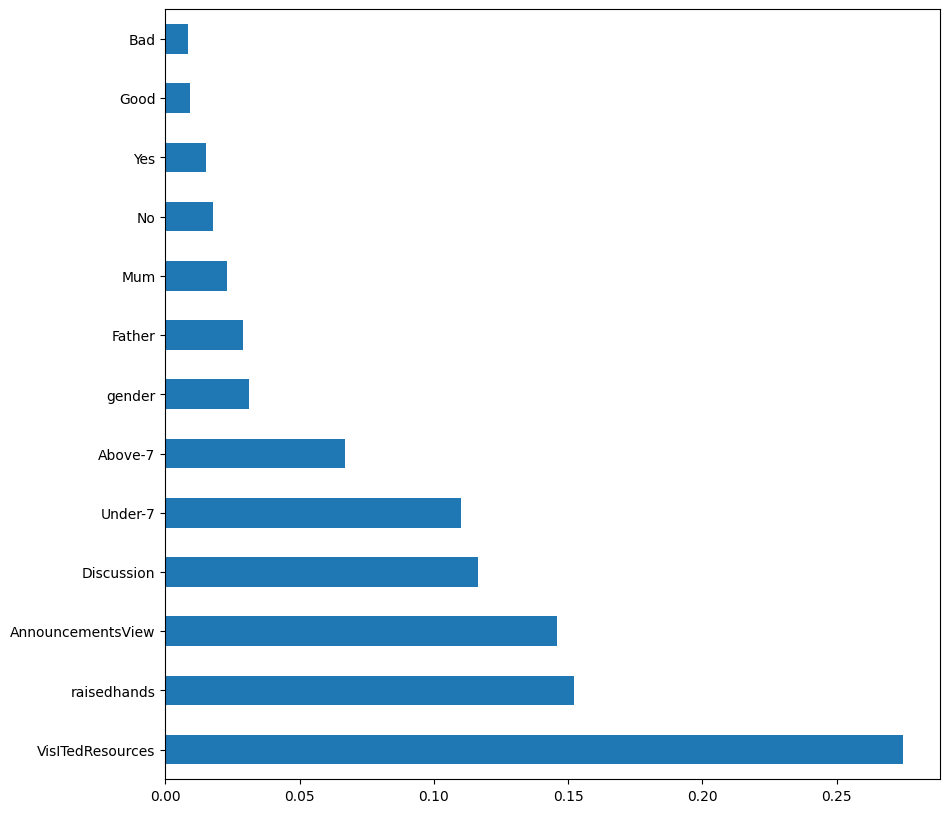

In [23]:
plt.figure(figsize=(10,10))
importance = pd.Series(rfc.feature_importances_,index=Features.columns)
importance.nlargest(15).plot(kind='barh')

#Importance of each feature starting fromleast to most

In [ ]:
#Thank You